# To Share or Not To Share: 
# A Comprehensive Appraisal of Weight-Sharing

# Generating Search Spaces
Simply run all cells __after having specified to path to the nasbench dataset__ and wait for a while

In [1]:
import nasbench.api as api
import numpy as np
import graphviz
import pickle
import sys

from copy import deepcopy

sys.path.append("..")

from models.graph_utils import *

In [2]:
INPUT = 'input'
OUTPUT = 'output'
CONV1X1 = 'conv1x1-bn-relu'
CONV3X3 = 'conv3x3-bn-relu'
MAXPOOL3X3 = 'maxpool3x3'

PATH_TO_NASBENCH = "../datasets/nasbench_only108.tfrecord"
nasbench = api.NASBench(PATH_TO_NASBENCH)

Loading dataset from file... This may take a few minutes...
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Loaded dataset in 40 seconds


In [3]:
# putting all the nasbench metrics into a list
metrics = []
nasbench_iter = nasbench.hash_iterator()
for key in nasbench_iter:
    metric = nasbench.get_metrics_from_hash(key)
    metrics.append(metric)

In [4]:
# iterating over nasbench, and noting for each architecture
# the number of output nodes, and whether there is a residiual connections
metrics = []
n_outs = []
is_res = []

for key in nasbench_iter:
    
    data = nasbench.get_metrics_from_hash(key)
    
    # adjacency matrix of the current architecture 
    matrix = data[0]["module_adjacency"]
    
    # n_outs, is_res
    n_outs.append(np.sum(matrix[1:, -1]))
    is_res.append(matrix[0, -1] == 1)
    metrics.append(data)
    
metrics = metrics
n_outs = np.array(n_outs)
is_res = np.array(is_res)

## A0

In [5]:
with open("../datasets/sp_full.pkl", "wb") as f:
    pickle.dump(metrics, f)

## A4, A3, A2, A1

In [6]:
for n in [1, 2, 3, 4]:
    
    metrics_sp = []
    for i in range(len(metrics)):
        if n_outs[i] == n:
            metrics_sp.append(metrics[i])
        
    with open("../datasets/sp_{}.pkl".format(n), "wb") as f:
        pickle.dump(metrics_sp, f)

## A0_no_res A0_res

In [7]:
for res in [0, 1]:
    
    metrics_sp = []
    for i in range(len(metrics)):
        if is_res[i] == res:
            metrics_sp.append(metrics[i])
            
    with open("../datasets/sp_full_{}.pkl".format(res), "wb") as f:
        pickle.dump(metrics_sp, f)

## Visualize Architectures from the Search Spaces

In [8]:
from models.graph_utils import print_graph

In [9]:
# sp = "4"
# sp = "3"
# sp = "2"
# sp = "1"
# sp = "full"
# sp = "full_0"
sp = "full_1"

with open("../datasets/sp_{}.pkl".format(sp), "rb") as f:
    d = pickle.load(f)

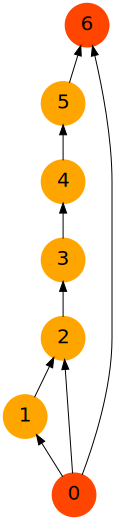

In [10]:
print_graph(d[np.random.randint(len(d))][0]["module_adjacency"])